# SUPER COMPUTAÇÃO
Fernando Fincatti, 7º semestre

### INTRODUÇÃO

O presente trabalho tem como objetivo a análise de todas as 6 implementações desenvolvidas ao longo do curso de super computação, sendo elas: solução heurística, busca local, busca exaustiva, busca exaustiva paralelizada em CPU e busca exaustiva paralelizada em CPU + GPU.

Todos os algoritmos tem como função resolver o problema de alinhamento de sequências de DNA, o qual consiste no processo de comparar duas ou mais sequências de bases de forma a se observar seu nível de similaridade, que por sua vez pode ser calculado com base em um sistema de pontuação, no qual acertos (MATCH) resultam em pontos positivos, ao passo que os erros (MISS MATCH ou GAPS) resultam em pontos negativos. 

O sistema de pontuação utilizado é apresentado abaixo:

*   MATCH = 2
*   MISS MATCH = -1
*   GAP = -1

Dessa forma, cada uma das 6 abordagens tem como objetivo encontrar o máximo nível de similaridade, o score, entre as duas sequências de entrada.




#### SOLUÇÃO HEURÍSTICA

A abordagem da solução heurística consiste em utilizar o algoritmo de Smith-Walterman para computar o score para duas sequências.

O resultado obtido, o score, é sempre o máximo global para a entrada dado ao algoritmo, uma vez que é necessário preencher uma matriz completa, calculando todos os possíveis valores, retornando apenas o maior.

Para realizar a implementação, cada célula da matriz é uma struct, o qual contém não só o valor do melhor score para aquela célula, mas também um par de coordenadas (x,y), apontando de onde aquele score foi originado, ou seja, se foi feito uma inserção, deleção ou alinhamento para chegar até o valor obtido. Portanto, ao chegar ao final da matriz, é possível saber todo o caminho que originou o melhor score, basta ir voltando pelas coordenadas (x,y) apontandas por cada célula, partindo-se inicialmente do maior score.

#### BUSCA LOCAL

A proposta do algoritmo de busca local é gerar uma aleatorização, de forma que dado duas sequências A e B, são geradas p subsequências (sa) e comparado cada par (sa, sb) salvando o valor do melhor score. 

Não foi necessário utilizar durante o desenvolvimento o algoritmo de Smith-Walterman para computar o score, uma vez que as subsequências geradas possuem sempre o mesmo tamanho, ou seja, é possível fazer uma comparação simples, letra por letra, o que inclusive é mais rápido do que calcular toda a matriz, como na abordagem heurística.

É importante notar que essa abordagem não retorna, necessariamente, o valor máximo global, uma vez que não compara todas as possíveis subsequências. Além disso, o resultado pode variar de acordo com o valor p gerado.

#### BUSCA EXAUSTIVA

O algoritmo de busca exaustiva tem como objetivo encontrar sempre o máximo global para duas sequências de nucleotídeos. 

O funcionamento consiste em, dado duas sequências A e B, gerar todas as subsequências possíveis para ambas e comparar todas as possíveis combinações de subsequência, retornando o melhor valor encontrado.

Para a primeira versão (busca exaustiva [01]) foi usado o Smith-Walterman para computar o score, já na segunda versão (busca exaustiva [02]) foi usado o Smith-Walterman quando as subsequências possuiam tamanhos diferentes, e o cálculo via score simples (comparação letra a letra) quando as subsequências tinham tamanhos iguais.

Vale notar que essa abordagem certamente demanda muito tempo de processamento, uma vez que resolve o problema na força bruta, computando todos os resultados possíveis.

#### BUSCA EXAUSTIVA PARALELIZADA EM CPU (OPENMP)

Tomando como base a implementação apresentada no item anterior, a busca exaustiva, podemos claramente indentificar pontos onde o processamento dos dados poderiam ser paralelos, e dessa forma damos origem há um novo algoritmo, paralelizado usando OpenMp, ou seja, utilizando os diferentes cores da CPU.

Nessa abordagem, temos uma estratégia extremamente parecida com a anterior, porém no loop principal do código, ou seja, o que calcula o score para todas as possíveis combinações de subsequência possíveis, foi adicionado uma configuração para que tudo seja feito de forma paralela. Em outras palavras, cada core da CPU recebe, simultaneamente, um par de subsequências e calcula seu score de forma independente.

É importante resaltar que foram necessárias certas mudanças na estrutura do código. Enquanto a abordagem anterior utilizava dois loops para comparar todas as subsequências de A e B, na abordagem utilizando OpenMp foi necessário transformar tudo em um único laço, deivdo à incompatibilidades na biblioteca, a qual não suporta paralelizar dois loops, um dentro do outro.

#### BUSCA EXAUSTIVA PARALELIZADA EM CPU + GPU (OPENMP + THRUST)

### ANÁLISE

Para efeito de comparação, todos os 6 algoritmos serão expostos à comparações em relação ao tempo de execução e ao resultado encontrado (score).

Durante o processo de análise, foi necessário criar regressões para simular o comportamento das implementações para tamanhos de entradas maiores. Isso ocorre pois algumas abordagens são menos eficientes, em termos de tempo, em relação as outras, como por exemplo a busca exaustiva, tornando-se inviável sua execução para sequências muitos grandes de nucleotídeos.

#### TEMPO

Para uma primeira análise, foi gerado um gráfico com o resultado de execução de todas as soluções implementadas até o momento, de forma que fosse possível ter um panorâma geral do tempo de execução de cada uma. Análises mais especificas serão abordadas em etapas futuras. A imagem abaixo demonstra os resultados obtidos.

In [1]:
#gloabals
from utils import *
n_size_list = get_n_sizes("n-sizes").split(" ")[1:]
exe_list = ["exe{0}".format(str(i)) for i in range(1, 5)]
input_list = ["input{0}".format(str(i)) for i in range(0, 998)]

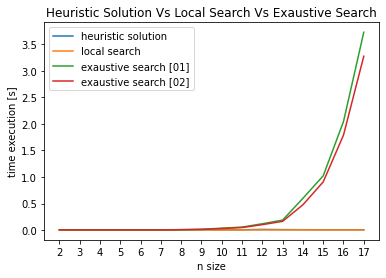

In [2]:
input_cut = 16
results = load_results("./results/hle.pkl")
print_lines(results, n_size_list[0:input_cut], "Heuristic Solution Vs Local Search Vs Exaustive Search", "n size", "time execution [s]", "clock")

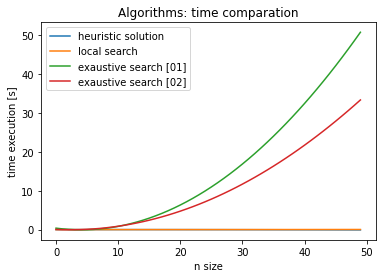

In [15]:
project_cut = 50
projected_results = project_results(results, 0, project_cut)
print_lines(projected_results, range(0, project_cut), "Algorithms: time comparation", "n size", "time execution [s]", "clock")